# CUNY MSDS DATA620 - Web Analytics

# Week 3 - Project 1 | Centrality Measures Across Categorical Groups 

## Team1 : Ramnivas Singh, Deepak Sharma, Tage Singh

### Description

Word Adjacencies for the novel "David Copperfield" 

Nodes represent the most commonly occurring adjectives and nouns in the book. Node values are 0 for adjectives and 1
for nouns. Edges connect any pair of words that occur in adjacent position in the text of the book.

1.Brief Description:http://www-personal.umich.edu/~mejn/netdata/.

2.Dataset:http://www-personal.umich.edu/~mejn/netdata/adjnoun.zip



In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
from scipy import stats
import copy

import networkx as nx
G=nx.Graph()

import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request

import warnings

from datetime import date
today = date.today()
print(today)

2021-06-23


In [2]:
webUrl  = urllib.request.urlopen("https://raw.githubusercontent.com/tagensingh/DATA620-WEEK-3/main/adjnoun.gml")
# print ("result code: " + str(webUrl.getcode())) - Used for testing the url connection
G =  nx.read_gml(webUrl)

In [3]:
print(" No of Nodes : ",len(G))
print("\n")
print(" Graph Diameter : ",nx.diameter(G))
print("\n")

 No of Nodes :  112


 Graph Diameter :  5




In [4]:
print("The number of total edges is ", nx.number_of_edges(G))
edges = pd.DataFrame(list(nx.edges(G)))
edges.columns = ['Source', 'Target']
edges.head(10)


The number of total edges is  425


,Source,Target
0,agreeable,man
1,agreeable,old
2,agreeable,person
3,man,old
4,man,first
5,man,black
6,man,little
7,man,young
8,man,best
9,man,better


In [5]:
# Tail edges
edges.tail(n=10)

,Source,Target
415,strange,something
416,thought,nothing
417,thought,possible
418,nothing,half
419,nothing,wrong
420,wrong,something
421,side,world
422,quiet,same
423,same,strong
424,strong,usual


In [6]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

# Print the max degrees
max(degrees)


[3, 14, 33, 9, 2, 7, 6, 11, 1, 17, 4, 7, 10, 6, 12, 12, 3, 49, 14, 9, 5, 10, 5, 8, 15, 14, 11, 15, 13, 5, 6, 12, 10, 5, 7, 6, 7, 10, 9, 5, 4, 8, 7, 28, 7, 6, 3, 5, 10, 5, 15, 28, 7, 6, 13, 3, 4, 3, 2, 13, 5, 2, 2, 5, 1, 6, 7, 4, 12, 2, 12, 6, 7, 7, 1, 10, 12, 3, 3, 13, 8, 6, 1, 5, 6, 2, 2, 10, 6, 7, 1, 1, 6, 2, 3, 1, 3, 1, 5, 2, 3, 2, 10, 9, 21, 7, 6, 2, 4, 1, 2, 1]


49

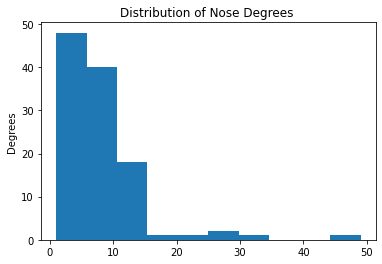

In [7]:
plt.figure()
plt.hist(degrees)
plt.title("Distribution of Nose Degrees ")
plt.ylabel('Degrees')
plt.show()

In [8]:
# for each node in the graph
node_color = []
for node in G.nodes(data=True):
    wrd_type = node[1]['value']
    if wrd_type == 0:
        node_color.append('red')
    elif wrd_type == 1:
        node_color.append('blue')    

Text(0.5, 1.0, 'Word Adjacencies for the novel - David Copperfield - ')

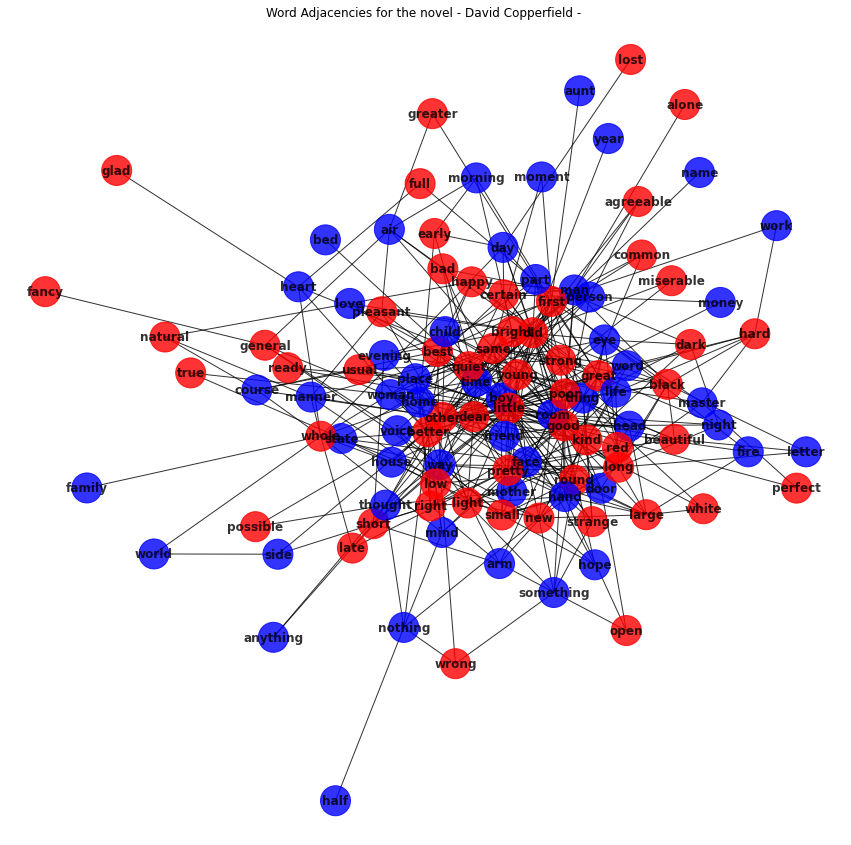

In [9]:
# Creating a network analysis
plt.figure(figsize=(15,15))
plt.axis('off')

nx.draw(G, with_labels=True, alpha=0.8, edge_color="black",font_weight="bold",node_color=node_color,node_size=900)

plt.title("Word Adjacencies for the novel - David Copperfield - ")

In [10]:
warnings.filterwarnings('ignore')

node_df = pd.DataFrame(list(G.nodes(data = True)))
node_df.rename(columns= {0:'Count', 1: 'Values'}, inplace = True)
node_df['Word_type'] = ''
dict_view  = { 0:'Adjectives',
             1: 'Noun'}
for x in range(len(node_df['Values'])):
    word_view = node_df['Values'][x]['value'] 
    node_df['Word_type'][x] = dict_view[word_view]
node_df.drop(['Values'], axis =1, inplace = True)

In [11]:
node_df.groupby(['Word_type']).count().reset_index()

,Word_type,Count
0,Adjectives,58
1,Noun,54


In [12]:
# Creating a dataframe with nodes and their required calculations
cal = pd.DataFrame()
cal['eigen_cent'] = nx.eigenvector_centrality(G).values()
cal['degree_cent'] = nx.degree_centrality(G).values()
cal['between_cent'] = nx.betweenness_centrality(G).values()
cal['close_centr'] = nx.closeness_centrality(G).values()
# Printing results
cal.index = list(G)
print(cal.to_string())

           eigen_cent  degree_cent  between_cent  close_centr
agreeable    0.039175     0.027027      0.000101     0.375000
man          0.139934     0.126126      0.036504     0.468354
old          0.283273     0.297297      0.128673     0.546798
person       0.091952     0.081081      0.010832     0.437008
anything     0.009945     0.018018      0.000183     0.319885
short        0.073668     0.063063      0.012703     0.426923
arm          0.047237     0.054054      0.004201     0.382759
round        0.112187     0.099099      0.007911     0.442231
aunt         0.010778     0.009009      0.000000     0.327434
first        0.141728     0.153153      0.070844     0.484716
bad          0.032017     0.036036      0.000831     0.349057
air          0.049409     0.063063      0.013722     0.392226
boy          0.118416     0.090090      0.009120     0.445783
beautiful    0.068528     0.054054      0.004765     0.414179
black        0.118972     0.108108      0.018315     0.449393
face    

In [13]:
# Most popular characters
cal.sort_values('eigen_cent', ascending=False)

,eigen_cent,degree_cent,between_cent,close_centr
little,0.400976,0.441441,0.244685,0.616667
old,0.283273,0.297297,0.128673,0.546798
good,0.242143,0.252252,0.094879,0.526066
other,0.219903,0.252252,0.097456,0.511521
same,0.188400,0.189189,0.049765,0.488987
...,...,...,...,...
family,0.005092,0.009009,0.000000,0.290576
lost,0.004928,0.009009,0.000000,0.299191
fancy,0.002745,0.009009,0.000000,0.276119
glad,0.001762,0.009009,0.000000,0.269417


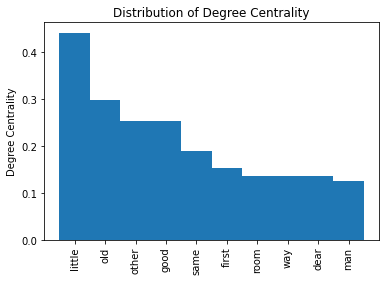

In [14]:
top_10 = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10] # Sort the top 10

labels, ys = zip(*top_10)
xs = np.arange(len(labels)) 
width = 1
plt.bar(xs, ys, width, align='center')
#plt.bar(top_10.keys, top_10.values, align='center')
plt.xticks(xs, labels, rotation='vertical') 
plt.title("Distribution of Degree Centrality")
plt.ylabel('Degree Centrality')
plt.show()

print("\n")

#### Conclusion

Given that the dataset is from a book written in 1849, we think that the adjacancy dataset for any book from this period would have similar centralities. We are interested in sourcing another dataset of similar structure and compare the centralities. We cre concluding that the centralities of these works are unique to the period/genre.




In [15]:
print("\n")
# creating graphml 
nx.write_graphml(G, "project1.graphml")

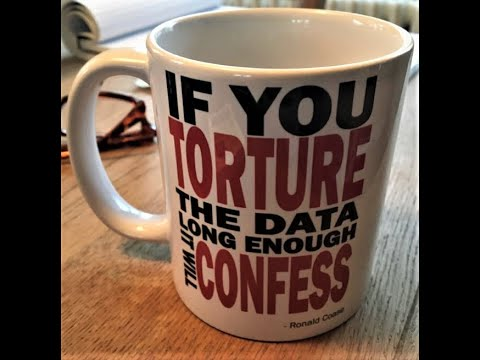

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('vS-jilb4X8M')

#### References
Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.

Davis, A et al. (1941). Deep South. Chicago: University of Chicago Pre

Robert A. Hanneman (Department of Sociology, University of California, Riverside) Social network data

M. E. J. Newman, Finding community structure in networks using the eigenvectors of matrices, Preprint physics/0605087 (2006).